# CALIDAD DE DATOS

## IMPORTAR PAQUETES

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from janitor import clean_names

%matplotlib inline

#Automcompletar rápido
%config IPCompleter.greedy=True

#Desactivar notación científica
pd.options.display.float_format = '{:,.2f}'.format

## IMPORTAR LOS DATOS

Sustituir la ruta del proyecto.

In [35]:
ruta_proyecto = 'C:/Users/mig_g/OneDrive/PROYECTOS_MIGUEL/SCORING_RIESGOS'
ruta_proyecto

'C:/Users/mig_g/OneDrive/PROYECTOS_MIGUEL/SCORING_RIESGOS'

In [36]:
nombre_fichero_datos = 'trabajo.csv'

Cargar los datos.

In [37]:
ruta_completa = ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_fichero_datos

df = pd.read_csv(ruta_completa,index_col='id_cliente', sep=',')
df

,Unnamed: 0,empleo,antigüedad_empleo,ingresos,ingresos_verificados,rating,dti,vivienda,num_hipotecas,num_lineas_credito,...,id_prestamo,descripcion,finalidad,principal,tipo_interes,num_cuotas,imp_cuota,imp_amortizado,estado,imp_recuperado
id_cliente,,,,,,,,,,,,,,,,,,,,,
137387967,0,Hvac technician,3 years,"54,000.00",Source Verified,A,19.31,MORTGAGE,2.00,10.00,...,NaN,NaN,debt_consolidation,"15,000.00",7.21,36 months,464.60,"2,669.06",Current,0.00
4798121,1,"Target Promotions and Marketing,Inc",10+ years,"65,000.00",Not Verified,D,25.40,RENT,1.00,15.00,...,NaN,NaN,debt_consolidation,"10,000.00",17.77,36 months,360.38,"6,362.96",Charged Off,0.00
46641215,2,Banker,5 years,"135,000.00",Verified,A,14.68,RENT,0.00,19.00,...,NaN,NaN,debt_consolidation,"24,000.00",6.39,36 months,734.38,"24,000.00",Fully Paid,0.00
87998444,3,executive director,9 years,"188,000.00",Source Verified,B,11.69,MORTGAGE,3.00,15.00,...,NaN,NaN,credit_card,"27,000.00",8.99,60 months,560.35,"12,443.00",Current,0.00
132883631,4,Subsea Technician,7 years,"125,000.00",Source Verified,B,9.00,MORTGAGE,1.00,6.00,...,NaN,NaN,debt_consolidation,"22,000.00",10.90,36 months,719.22,"22,000.00",Fully Paid,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129396054,199993,Field Manager,10+ years,"55,000.00",Source Verified,D,15.36,OWN,1.00,7.00,...,NaN,NaN,debt_consolidation,"14,400.00",17.47,60 months,361.53,"1,975.94",Current,0.00
119242742,199994,NaN,NaN,"20,000.00",Source Verified,C,8.02,RENT,0.00,5.00,...,NaN,NaN,debt_consolidation,"2,500.00",12.62,36 months,83.78,996.06,Late (31-120 days),0.00
121031962,199996,Owner & President,6 years,"111,697.00",Verified,B,16.63,MORTGAGE,2.00,10.00,...,NaN,NaN,other,"10,000.00",9.44,36 months,320.05,"4,388.51",Current,0.00


## VISIÓN GENERAL

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140000 entries, 137387967 to 94394801
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   140000 non-null  int64  
 1   empleo                       129718 non-null  object 
 2   antigüedad_empleo            130979 non-null  object 
 3   ingresos                     140000 non-null  float64
 4   ingresos_verificados         140000 non-null  object 
 5   rating                       140000 non-null  object 
 6   dti                          139900 non-null  float64
 7   vivienda                     140000 non-null  object 
 8   num_hipotecas                136924 non-null  float64
 9   num_lineas_credito           139997 non-null  float64
 10  porc_tarjetas_75p            135406 non-null  float64
 11  porc_uso_revolving           139898 non-null  float64
 12  num_cancelaciones_12meses    139992 non-null  fl

### Corrección

Eliminar la variable Unnamed: 0

In [39]:
df.drop(columns='Unnamed: 0',inplace=True)

## TIPOS DE DATOS

### Identificación

In [40]:
df.dtypes

empleo                          object
antigüedad_empleo               object
ingresos                       float64
ingresos_verificados            object
rating                          object
dti                            float64
vivienda                        object
num_hipotecas                  float64
num_lineas_credito             float64
porc_tarjetas_75p              float64
porc_uso_revolving             float64
num_cancelaciones_12meses      float64
num_derogatorios               float64
num_meses_desde_ult_retraso    float64
id_prestamo                    float64
descripcion                     object
finalidad                       object
principal                      float64
tipo_interes                   float64
num_cuotas                      object
imp_cuota                      float64
imp_amortizado                 float64
estado                          object
imp_recuperado                 float64
dtype: object

## VALORES ÚNICOS

### Identificación

In [41]:
df.nunique().sort_values()

id_prestamo                        0
num_cuotas                         2
ingresos_verificados               3
num_cancelaciones_12meses          6
vivienda                           6
rating                             7
estado                             9
antigüedad_empleo                 11
finalidad                         14
num_derogatorios                  20
num_hipotecas                     25
num_lineas_credito                60
num_meses_desde_ult_retraso      130
porc_tarjetas_75p                166
tipo_interes                     584
porc_uso_revolving              1092
principal                       1479
dti                             5304
descripcion                     7716
imp_recuperado                 10583
ingresos                       11656
imp_cuota                      33503
empleo                         54400
imp_amortizado                 57743
dtype: int64

* Eliminar id_prestamo, ya que tiene menos de 2 valores

### Corrección

In [42]:
df.drop(columns = 'id_prestamo', inplace = True)

## DUPLICADOS

### Identificación

In [43]:
df.duplicated().sum()

0

## SEPARAR NUMÉRICAS Y CATEGÓRICAS

### Categóricas

In [44]:
cat = df.select_dtypes(exclude = 'number').copy()

### Numéricas

In [45]:
num = df.select_dtypes(include='number').copy()

## GESTIÓN DE CATEGÓRICAS

### Nulos

#### Identificación

In [46]:
cat.isna().sum().sort_values(ascending = False)

descripcion             132262
empleo                   10282
antigüedad_empleo         9021
ingresos_verificados         0
rating                       0
vivienda                     0
finalidad                    0
num_cuotas                   0
estado                       0
dtype: int64

In [47]:
cat.descripcion.value_counts(dropna=False)

NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           132262
                                                                                                                                                                   

In [48]:
cat.empleo.value_counts(dropna=False)

NaN                                     10282
Teacher                                  2522
Manager                                  2151
Owner                                    1388
Registered Nurse                         1018
                                        ...  
Insurance agent / registered rep            1
glazer                                      1
Customer Retention Specialist  / LSP        1
Journey Admin Clerk                         1
Owner & President                           1
Name: empleo, Length: 54401, dtype: int64

In [49]:
cat.antigüedad_empleo.value_counts(dropna=False)

10+ years    46195
2 years      12501
< 1 year     11741
3 years      11268
1 year        9164
NaN           9021
5 years       8707
4 years       8462
6 years       6378
7 years       5835
8 years       5741
9 years       4987
Name: antigüedad_empleo, dtype: int64

* sustituir todas por valor 'desconocido'

#### Corrección

##### Imputar por un valor

###### Variables a imputar

In [50]:
var_imputar_desconocido = ['descripcion','empleo','antigüedad_empleo']

###### Imputar

In [51]:
cat[var_imputar_desconocido] = cat[var_imputar_desconocido].fillna('desconocido')

## GESTIÓN DE NUMÉRICAS

### Nulos

#### Identificación

In [52]:
num.isna().sum().sort_values(ascending = False)

num_meses_desde_ult_retraso    71836
porc_tarjetas_75p               4594
num_hipotecas                   3076
porc_uso_revolving               102
dti                              100
num_cancelaciones_12meses          8
num_lineas_credito                 3
num_derogatorios                   3
ingresos                           0
principal                          0
tipo_interes                       0
imp_cuota                          0
imp_amortizado                     0
imp_recuperado                     0
dtype: int64

Veamoslas con más detalle.

In [53]:
meses_ult_retraso = num.num_meses_desde_ult_retraso.value_counts(dropna=False).sort_index()
meses_ult_retraso

0.00        186
1.00        439
2.00        595
3.00        809
4.00        975
          ...  
148.00        2
159.00        1
180.00        1
195.00        1
NaN       71836
Name: num_meses_desde_ult_retraso, Length: 131, dtype: int64

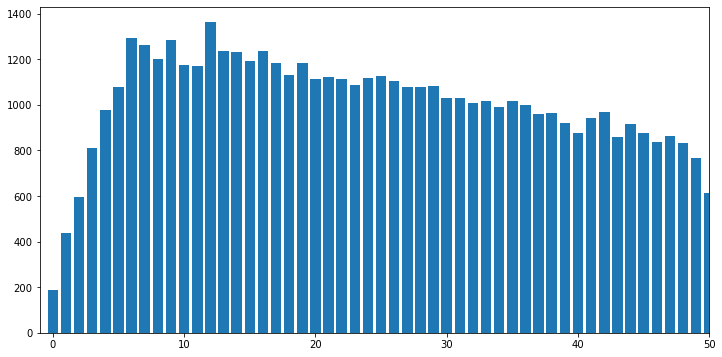

In [54]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(meses_ult_retraso.index, meses_ult_retraso)
ax.set_xlim([-1, 50]);

Hay ceros, pero parecen pocos (solo hay 186) para una variable (de 140 mil registros) que implica retrasos.
Así que se puede asumir que los nulos significan que no ha habido retrasos; por tanto se imputaran por ceros.

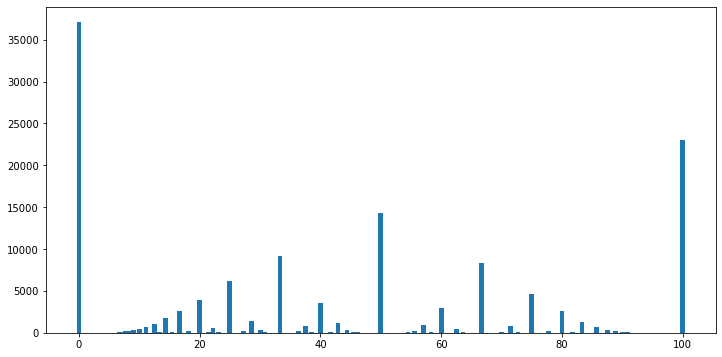

In [55]:
fig, ax= plt.subplots(figsize = (12,6))
ax.bar(num.porc_tarjetas_75p.value_counts().sort_index().index, num.porc_tarjetas_75p.value_counts().sort_index());

In [56]:
num.porc_tarjetas_75p.value_counts().isna().sum()
num.porc_tarjetas_75p.value_counts(dropna=False).sort_index()

0.00      37083
0.25          1
0.40          1
0.50          4
0.57          1
          ...  
94.10         2
94.40         2
94.70         1
100.00    23018
NaN        4594
Name: porc_tarjetas_75p, Length: 167, dtype: int64

La categoría mayoritaria es cero. Se imputara por cero.

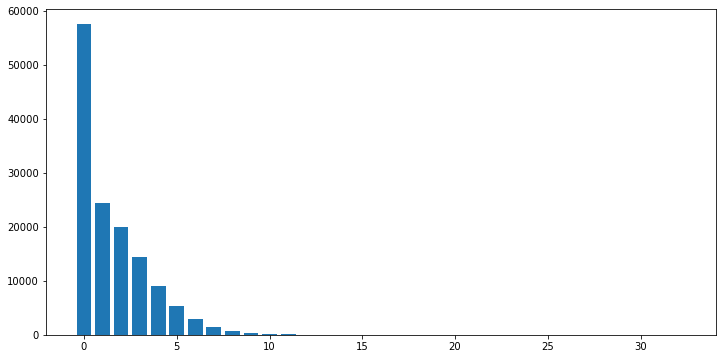

In [57]:
fig, ax = plt.subplots(figsize =(12,6))
ax.bar(num.num_hipotecas.value_counts().sort_index().index,num.num_hipotecas.value_counts().sort_index());

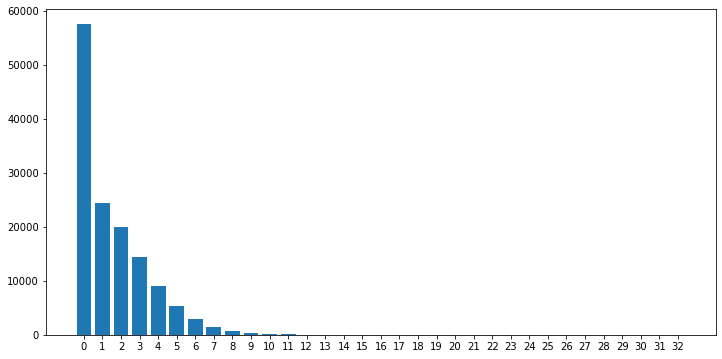

In [58]:
# para ver todas las etiquetas (de 1 en 1) en el eje x:
# eliminamos los nulos y convertimos los demas a entero
hipotecas = num.num_hipotecas.dropna().astype(int).value_counts().sort_index()

fig, ax = plt.subplots(figsize =(12,6))
ax.bar(hipotecas.index,hipotecas);

ax.set_xticks(range(hipotecas.index.min(), hipotecas.index.max()+1)); # muestra todas las etiquetas

In [59]:
num.num_hipotecas.value_counts(dropna=False).sort_index()

0.00     57574
1.00     24497
2.00     20055
3.00     14445
4.00      9117
5.00      5370
6.00      2881
7.00      1504
8.00       701
9.00       341
10.00      198
11.00       97
12.00       41
13.00       38
14.00       24
15.00       15
16.00        5
17.00        7
18.00        5
19.00        3
20.00        1
21.00        2
23.00        1
25.00        1
32.00        1
NaN       3076
Name: num_hipotecas, dtype: int64

La categoría mayoritaria es cero. Tambien se imputará por cero.

#### Corrección

In [60]:
# todos los nulos se iumputaran por cero
num.fillna(0,inplace=True)

### Atípicos

#### Por desviación típica

##### Identificación

###### Definir el número de desviaciones típicas

In [61]:
num_desv_tip = 4

###### Función que devuelve los índices de los atípicos

In [62]:
def atipicos_desv_tip(variable, num_desv_tip = 4):
    #sacamos los nulos por ahora
    variable = variable.dropna()
    #calculamos los límites
    media = np.mean(variable)
    sd = np.std(variable)
    umbral = sd * num_desv_tip
    lim_inf = media - umbral
    lim_sup = media + umbral
    #encontramos los índices de los que están fuera de los límites
    indices = [indice for indice,valor in variable.items() if valor < lim_inf or valor > lim_sup]
    return(indices)

###### Función que cuenta el número de atípicos

In [63]:
def conteo_atipicos(df,variable, num_desv_tip = 4):
    atipicos = atipicos_desv_tip(df[variable], num_desv_tip)
    return(df.loc[atipicos,variable].value_counts().sort_index())

###### Variables a aplicar

In [64]:
var_atipicos_dt = ['ingresos','principal','imp_cuota','imp_recuperado']

###### Aplicar

In [65]:
for variable in var_atipicos_dt:
    print('\n' + variable + ':\n')
    print(conteo_atipicos(num,variable,num_desv_tip))


ingresos:

410,000.00       7
410,396.00       1
415,000.00       5
417,000.00       1
418,000.00       1
                ..
6,702,150.00     1
8,500,000.00     1
8,500,021.00     1
9,550,000.00     1
10,999,200.00    1
Name: ingresos, Length: 151, dtype: int64

principal:

Series([], Name: principal, dtype: int64)

imp_cuota:

1,535.71    1
1,566.80    2
1,607.80    1
1,714.54    1
Name: imp_cuota, dtype: int64

imp_recuperado:

3,178.71     1
3,179.44     1
3,182.39     1
3,183.00     1
3,183.43     1
            ..
22,375.53    1
22,618.00    1
26,172.99    1
33,407.16    1
33,666.34    1
Name: imp_recuperado, Length: 1600, dtype: int64


Revisamos con más detalle la variable ingresos.

In [66]:
num.ingresos.describe()

count      140,000.00
mean        78,120.41
std         82,075.62
min              0.00
25%         46,025.50
50%         65,000.00
75%         93,000.00
max     10,999,200.00
Name: ingresos, dtype: float64

##### Corrección

se propone eliminar los registros con ingresos superiores a 300.000$

Al **eliminar registros** hay que hacerlo tanto en **cat** como de **num**

###### Id de registros a eliminar

In [67]:
a_eliminar = num.loc[num.ingresos > 300000].index.values
a_eliminar

array([ 97629676,    601669, 115087816,  30115373,  88149047,  58654033,
        96702950,  57316403,  75468055, 104953803,  55380417,  68355962,
        60525500,  59101444,  70631462,  26329813, 101561119, 114093587,
       121891976, 145133997,  99967449,  70701688,  74845067, 113905376,
        69967314,  79015002,  33371205,  97457564, 110905405,  89794872,
       128843574,  93634763,  75358546,  39559363,  65038134,  70592833,
       104959821, 107733336,  77517938,  93092543,  91131807,    489907,
       122689487,  57074442, 133401013,  60831304,  40942257,  79492925,
       115085050,   3630153,  78419419,  79390430,  92659557, 138925364,
       125219862,  18895853, 109743090, 131383380, 141468030,  92035926,
        53252537,  60873988, 144125851,  12938159, 107355068, 125518577,
       120217704, 104110402,  59242936,   4044958, 104319520, 145242693,
         2367546,  79081285,  96979795,    620850,  40385541,  74585468,
       143147174, 125330617, 122347658, 140598256, 

###### Aplicar

In [68]:
cat = cat[~cat.index.isin(a_eliminar)]
num = num[~num.index.isin(a_eliminar)]

## GUARDAR DATASETS TRAS CALIDAD DE DATOS

### Definir los nombres de los archivos

In [69]:
ruta_trabajo = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'trabajo_resultado_calidad.pickle'
ruta_cat = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'cat_resultado_calidad.pickle'
ruta_num = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'num_resultado_calidad.pickle'

### Guardar los archivos

In [43]:
df.to_pickle(ruta_trabajo)
cat.to_pickle(ruta_cat)
num.to_pickle(ruta_num)